<a href="https://colab.research.google.com/github/feomedeirosdev/titanic-survival-prediction/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
# import itertools

palette = ['#9b5de5', '#fcd34d']
sns.set_palette(palette)

# ========== SUMMARY ==========
def summary_df(df):
  summary = pd.DataFrame({
      'DataType': df.dtypes,
      'UniqueValues': df.nunique(),
      'ExistingValues': df.notna().sum(),
      'MissingValues': df.isna().sum(),
      'Existingpercent': (df.notna().sum() / len(df)) * 100,
      'MissingPercent': (df.isna().sum() / len(df)) * 100,
  }).reset_index().rename(columns={'index': 'Variables'})

  return summary

# ========== PLOT CAT FEATURES ==========
def plot_cat_features(df, cat_features, cols=3, figsize=(3, 2)):
  """
  Plota gráficos de barras horizontais para variáveis categóricas em grade.
  """

  plt.rcParams['font.family'] = 'Liberation Mono'
  total = len(df)
  rows = math.ceil(len(cat_features) / cols)

  fig, axes = plt.subplots(rows, cols, figsize=(figsize[0]*cols, figsize[1]*rows))
  axes = axes.flatten()

  for i, col in enumerate(cat_features):
      ax = axes[i]
      order = sorted(df[col].dropna().unique())
      sns.countplot(data=df, y=col, order=order, ax=ax, edgecolor='black', legend=False)

      # Estilo
      ax.set_xlabel(None)
      ax.set_ylabel(None)
      ax.xaxis.set_ticks_position('none')
      ax.set_xticklabels([])
      ax.grid(False)
      for spine in ax.spines.values():
          spine.set_visible(False)
      ax.set_title(f'{col}', fontsize=10)

      ax.tick_params(axis='y', labelsize=8)

      for p in ax.patches:
          width = p.get_width()
          label = f' {width:.0f} ({100 * width / total:.1f}%)'
          ax.text(
              width,
              p.get_y() + p.get_height() / 2,
              label,
              ha='left', va='center',
              fontsize=8
          )

  # Remove subplots vazios
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()


# ========== PLOT NUM FEATURES ==========
def plot_num_features(df, num_features, cols=3, bins=20, figsize=(3, 2)):
  """
  Plota histogramas para variáveis numéricas em grade.
  """

  plt.rcParams['font.family'] = 'Liberation Mono'
  rows = math.ceil(len(num_features) / cols)

  fig, axes = plt.subplots(rows, cols, figsize=(figsize[0]*cols, figsize[1]*rows))
  axes = axes.flatten()

  for i, col in enumerate(num_features):
      ax = axes[i]
      sns.histplot(data=df, x=col, bins=bins, stat='probability', kde=True, ax=ax)

      ax.set_title(f'{col}', fontsize=10)
      ax.set_xlabel(None)
      ax.set_ylabel('Proporção')
      ax.grid(True, linestyle='--', alpha=0.4)

  # Remove axes extras
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

# ========== PLOT BOXPLOTS ==========
def plot_boxplots(df, num_features, cols=3, figsize=(3, 2)):
  """
  Plota boxplots horizontais para variáveis numéricas em grade.
  """

  plt.rcParams['font.family'] = 'Liberation Mono'
  rows = math.ceil(len(num_features) / cols)
  fig, axes = plt.subplots(rows, cols, figsize=(figsize[0]*cols, figsize[1]*rows))
  axes = axes.flatten()

  for i, col in enumerate(num_features):
      ax = axes[i]
      sns.boxplot(data=df, x=col, ax=ax, orient='h', fliersize=4, linewidth=1.5, color='#fcd34d')
      ax.set_title(f'{col}', fontsize=10)
      ax.set_xlabel(None)
      ax.set_yticks([])  # remove ticks verticais
      ax.grid(False)

  # Remove axes extras
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  plt.tight_layout()
  plt.show()

# ========== CORRELATION MATRIX ==========
def plot_corr_matrix(df, method='pearson', annot=True, figsize=(8, 8), cmap='rocket_r', mask_upper=True, round_decimals=1):
    """
    Plota uma matriz de correlação.

    Parâmetros:
        df (pd.DataFrame): DataFrame com as variáveis numéricas
        method (str): Método de correlação ('pearson', 'spearman', 'kendall')
        annot (bool): Mostrar os valores nas células
        figsize (tuple): Tamanho da figura
        cmap (str): Mapa de cores
        mask_upper (bool): Se True, esconde a metade superior
        round_decimals (int): Casas decimais dos valores anotados
    """

    # Calcula correlação
    corr = df.corr(method=method, numeric_only=True)

    # Máscara para esconder metade superior
    mask = np.triu(np.ones_like(corr, dtype=bool)) if mask_upper else None

    # Tamanho da figura
    plt.figure(figsize=figsize)

    # Heatmap
    sns.heatmap(
        corr.round(round_decimals),
        mask = np.triu(np.ones_like(corr, dtype=bool), k=1),
        vmin=-1,
        vmax=1,
        annot=annot,
        fmt=f'.{round_decimals}f',
        cmap=cmap,
        center=0,
        square=True,
        linewidths=.5,
        cbar_kws={"shrink": .75}
    )

    plt.title(f'Matriz de Correlação ({method.title()})', fontsize=16, pad=12)
    plt.xticks(rotation=90, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# ========== NUM ANALYSIS PLOT ==========
def num_analysis_plots(data, features, target, histplot=True, kde=True, hue=None, figsize=(12, 10), n_cols=3):
    """
    Gera histogramas (com ou sem kde) para um conjunto de features numéricas com separação por hue.

    Parâmetros:
        data (pd.DataFrame): DataFrame com os dados
        features (list): Lista de nomes das features numéricas
        target (str): Nome da variável-alvo (usada apenas para título/contexto)
        histplot (bool): Se True, plota histogramas
        kde (bool): Se True, plota curva de densidade (KDE)
        hue (str): Variável para colorir os gráficos (ex: 'Survived')
        figsize (tuple): Tamanho da figura (largura, altura)
        n_cols (int): Número de colunas na grade de plots

    Retorna:
        None
    """
    n_rows = math.ceil(len(features) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        if histplot:
            sns.histplot(
                data=data,
                x=feature,
                kde=kde,
                hue=hue,
                multiple="stack",
                stat='probability',
                ax=axes[idx],
            )
            axes[idx].set_title(f'{feature} X {hue}')
        else:
            sns.kdeplot(
                data=data,
                x=feature,
                hue=hue,
                ax=axes[idx],
                fill=True,
                common_norm=False,
            )
            axes[idx].set_title(f'Densidade de {feature} por {hue}')

    # Remove subplots extras
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f'Análise univariada das variáveis numéricas vs {target}', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

# ========== BOXPLOT ANALYSIS ==========
def num_boxplot_analysis(data, features, target, hue, figsize=(12, 10), n_cols=3):
    """
    Gera boxplots verticais para um conjunto de features numéricas, separados por classe do hue.

    Parâmetros:
        data (pd.DataFrame): DataFrame com os dados
        features (list): Lista de nomes das features numéricas
        target (str): Nome da variável-alvo (usado apenas no título)
        hue (str): Variável categórica usada para separar os boxplots (ex: 'Survived')
        figsize (tuple): Tamanho da figura (largura, altura)
        n_cols (int): Número de colunas na grade de plots

    Retorna:
        None
    """
    palette = {0: '#9b5de5', 1: '#fcd34d'}

    n_rows = math.ceil(len(features) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for idx, feature in enumerate(features):
        ax = axes[idx]

        for class_value in sorted(data[hue].dropna().unique()):
            sns.boxplot(
                data=data[data[hue] == class_value],
                x=[str(class_value)] * len(data[data[hue] == class_value]),  # repete classe no eixo x
                y=feature,
                ax=ax,
                color=palette[class_value]
            )

        ax.set_title(f'{feature} por {hue}')
        ax.set_xlabel(hue)
        ax.set_ylabel(feature)

    # Remove subplots extras
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(f'Boxplots das variáveis numéricas por {target}', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()


# ========== CAT TAX ANALYSIS PLOT ==========
def cat_target_meanplot(data, features, target, figsize=(10, 4), n_cols=3):
    """
    Plota a taxa média do target (classe 1) para cada categoria de cada feature.

    Parâmetros:
        data (pd.DataFrame): Conjunto de dados
        features (list): Lista de variáveis categóricas
        target (str): Nome da variável-alvo binária
        figsize (tuple): Tamanho da figura
        n_cols (int): Número de colunas na grade

    Retorna:
        None
    """

    n_rows = math.ceil(len(features) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, feature in enumerate(features):
        mean_target = data.groupby(feature)[target].mean().reset_index()

        sns.barplot(
            data=mean_target,
            x=feature,
            y=target,
            color=palette[0],
            ax=axes[i],
            edgecolor='black',
            linewidth=0.6
        )
        axes[i].set_title(f'{target} por {feature}')
        axes[i].set_ylim(0, 1)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle('Taxa média por categoria', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

# ========== CAT ANALYSIS PLOT ==========
def cat_target_countplot(data, features, target, figsize=(10, 4), n_cols=3):
    """
    Plota gráficos de barras com a frequência de cada categoria separada por classe do target.

    Parâmetros:
        data (pd.DataFrame): Conjunto de dados
        features (list): Lista de variáveis categóricas
        target (str): Nome da variável-alvo binária
        figsize (tuple): Tamanho da figura
        n_cols (int): Número de colunas na grade

    Retorna:
        None
    """

    palette_bin = {0: '#9b5de5', 1: '#fcd34d'}

    n_rows = math.ceil(len(features) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.countplot(
            data=data,
            x=feature,
            hue=target,
            palette=palette_bin,
            ax=axes[i],
            edgecolor='black',
            linewidth=0.6
        )
        axes[i].set_title(f'{feature} por {target}')
        axes[i].legend(title=target)

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle('Frequência das categorias por classe do target', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

# Titanic Survival Prediction - Estudo de Caso Profissional

---

Este notebook tem como objetivo fazer uma análise completa dos dados dos passageiros do Titanic obtidos na fonte publicamente disponível em:

[Titanic Survival Prediction Dataset](https://www.kaggle.com/datasets/yasserh/titanic-dataset)
por: *M Yasser H*

para em seguida aplicar um pipeline completo de Machine Learning com o objetivo de prever quais passageiros sobreviveram ao naufrágio.

---

Esse notebook está estruturado em 4 etapas:
1. Definição do problema  
2. Coleta e visão geral dos dados brutos
3. Criação da ABT e split dos dados  
4. Análise exploratória (EDA)

---

# 1. Definição o Problema

O naufrágio do Titanic em 1912 levou à morte de mais de 1.500 passageiros. Os registros contêm informações valiosas sobre os passageiros, como idade, sexo, classe da cabine e outros dados sociodemográficos.

A pergunta que norteia este estudo é:

> "Com base nos dados disponíveis, conseguimos prever com boa precisão quem teria mais chances de sobreviver ao desastre?"

Este é um **problema de classificação binária supervisionada**, onde a variável-alvo (target) é `Survived`:
- `0`: não sobreviveu
- `1`: sobreviveu

O objetivo é construir um modelo capaz de fazer essa predição com base em variáveis preditoras.


# 2. Coleta e Visão Geral dos dados Brutos

Coleta

In [ ]:
# Importação dos dados
data_path = '/content/drive/MyDrive/Titanic/input/Titanic-Dataset.csv'
df = pd.read_csv(data_path)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Informações Gerais dos Dados**

In [ ]:
print(f'Dimensões do DataFrame: {df.shape[0]} linhas e {df.shape[1]} colunas\n')
print(f'Número de Duplicatas: {df.duplicated().sum()}\n')
print(f'Variáveis Disponíveis:\n{df.columns.to_list()}')

Dimensões do DataFrame: 891 linhas e 12 colunas

Número de Duplicatas: 0

Variáveis Disponíveis:
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [ ]:
summary_df(df)

,Variables,DataType,UniqueValues,ExistingValues,MissingValues,Existingpercent,MissingPercent
0,PassengerId,int64,891,891,0,100.000000,0.000000
1,Survived,int64,2,891,0,100.000000,0.000000
2,Pclass,int64,3,891,0,100.000000,0.000000
3,Name,object,891,891,0,100.000000,0.000000
4,Sex,object,2,891,0,100.000000,0.000000
5,Age,float64,88,714,177,80.134680,19.865320
6,SibSp,int64,7,891,0,100.000000,0.000000
7,Parch,int64,7,891,0,100.000000,0.000000
8,Ticket,object,681,891,0,100.000000,0.000000
9,Fare,float64,248,891,0,100.000000,0.000000


In [ ]:
print('Classes da Variável Sex:')
print(f'{df["Sex"].value_counts()}')

Classes da Variável Sex:
Sex
male      577
female    314
Name: count, dtype: int64


In [ ]:
print('Classes da Variável Embarked:')
print(f'{df["Embarked"].value_counts()}')

Classes da Variável Embarked:
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


## Descrição das Variáveis e Primeiras Observações
---

1. **PassengerId:** ID do passageiro – 891 valores únicos – *integer*  
2. **Survived:** Indicador de sobrevivência – *integer*  
   - `0` = Não sobreviveu  
   - `1` = Sobreviveu  
3. **Pclass:** Classe da passagem – *integer*  
   - `1` = Primeira classe  
   - `2` = Segunda classe  
   - `3` = Terceira classe  
4. **Name:** Nome completo do passageiro – 891 valores únicos – *object*  
5. **Sex:** Sexo do passageiro – *object*  
   - `male`,
   - `female`  
6. **Age:** Idade em anos – 88 valores únicos, 177 ausentes – *float*  
7. **SibSp:** Número de irmãos e cônjuges a bordo – *integer*  
8. **Parch:** Número de pais e filhos a bordo – *integer*  
9. **Ticket:** Número do bilhete – 681 valores únicos, sem valores ausentes – *object*  
10. **Fare:** Valor da passagem – *float*  
11. **Cabin:** Número da cabine – 147 valores únicos, 687 ausentes – *object*  
12. **Embarked:** Porto de embarque – 2 valores ausentes – *object*  
    - `S` = Southampton (Inglaterra)  
    - `C` = Cherbourg (França)  
    - `Q` = Queenstown (Irlanda)

---

### Observações:

- Não há registros duplicados no conjunto de dados.
- A variável `Ticket` apresenta 681 valores únicos entre 891 registros, sugerindo que alguns bilhetes foram compartilhados entre passageiros – possivelmente membros de uma mesma família ou grupo.
- Apesar da alta proporção de dados ausentes em `Cabin`, sua letra indica o andar do Titanic em que ela se situa (A, B, C, D, E, F ou G), o que pode ser relevante para o desfecho. Será avaliada a criação de uma nova variável categórica `Deck`.
- A variável `Embarked` será mantida na ABT, para avaliar uma possível, ainda que improvável, relação entre o local de embarque (e seus fatores culturais ou socioeconômicos) e a taxa de sobrevivência.


**Definição das Vafiáveis de Interesse**

In [ ]:
df.select_dtypes(include=['object']).columns.tolist()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [ ]:
df.select_dtypes(include=['int', 'float']).columns.tolist()

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
df_cat_features = ['Sex', 'Embarked']
df_num_features = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

**Visualização Gráfica das Variáveis Categóricas**

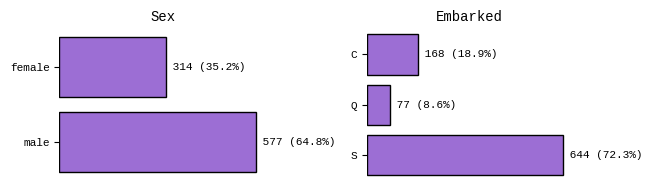

In [ ]:
plot_cat_features(df, df_cat_features)

**Visualização Gráfica das Variáveis Numéricas**

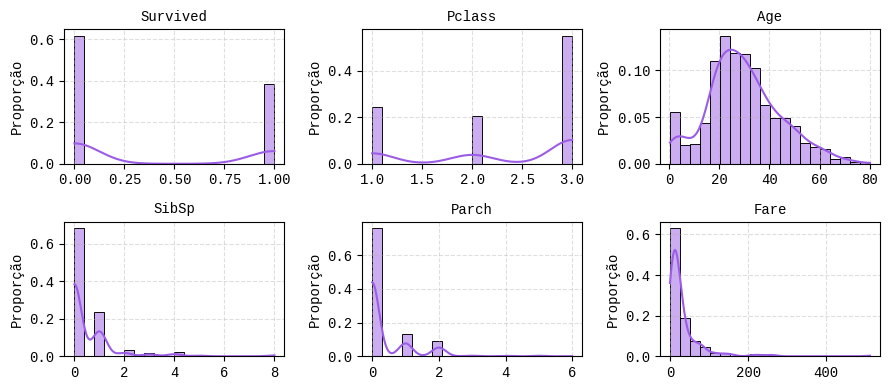

In [ ]:
plot_num_features(df, df_num_features)

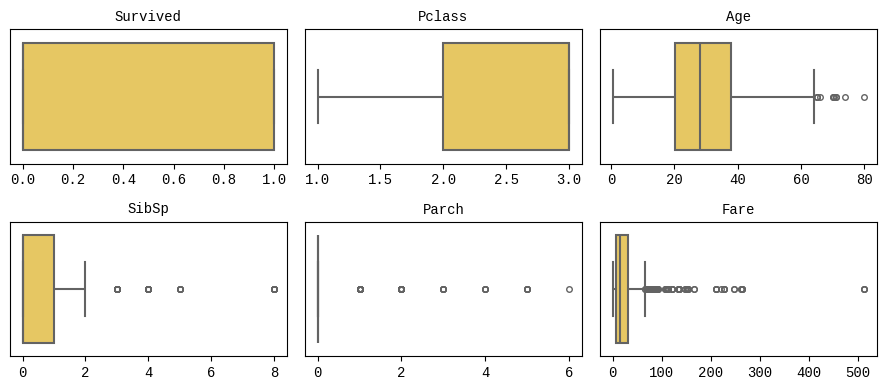

In [ ]:
plot_boxplots(df, df_num_features)

# 3. Criação da ABT e Split dos Dados

Começando com uma análise mais profunda da variável `Cabin` para a criação da variável `Deck`

In [ ]:
df['Cabin'].value_counts().reset_index()

,Cabin,count
0,G6,4
1,C23 C25 C27,4
2,B96 B98,4
3,F2,3
4,D,3
...,...,...
142,E17,1
143,A24,1
144,C50,1
145,B42,1


**OBS:** A averiguação acima indica que mais de uma pessoa podem ocupar a mesma cabine, o que seria normal, entretanto, também mostra que mais de uma pessoa podem ocupar cabines diferentes. Abaixo será criada uma função que averigua se uma ou mais pessoas ocuparam cabines em (andares) diferentes.

In [ ]:
def check_mixed_decks(df):
    """Retorna registros onde uma mesma entrada em 'Cabin' tem cabines de decks diferentes."""
    mask = df['Cabin'].apply(
        lambda x: len(set([cab[0] for cab in x.split()])) > 1 if pd.notna(x) else False
    )
    return df[mask]

check_mixed_decks(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,F G73,S


**OBS:** A averiguação acima mostra que quatro pessoas ocupam cabines em decks diferentes, entretanto todos os decks, no caso F e G estão no mesmo andar do navio, logo a criação da variável `deck` não perde sua semântica.

**Criação da Variável Deck**

In [ ]:
# Cópia de trabalho
df_abt = df.copy()

# Criação da variável Deck
df_abt['Deck'] = df['Cabin'].str.extract(r'([A-Za-z])')[0].str.upper()

df_abt['Deck'].value_counts().reset_index().T

,0,1,2,3,4,5,6,7
Deck,C,B,D,E,A,F,G,T
count,59,47,33,32,15,13,4,1


In [ ]:
filtro = df['Cabin'].fillna('').str.contains('T', regex=False)
df[filtro]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


**OBS:** Não existe cabine que começa com a letra "T" no Titanic, o que pode significar um erro de transcrição nos dados. Essa entrada será tratada como dado ausente.


**Criação da ABT**

In [ ]:
# Corrigindo o provavel erro de transcrição
df_abt['Deck'] = df_abt['Deck'].replace('T', np.nan)

# Remoção da colunas irrelevantes ou redundantes
cols_to_remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_abt.drop(columns=cols_to_remove, inplace=True)

# Reorganização da ABT
df_abt = df_abt[['Pclass', 'Fare', 'Deck', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Survived']]

# Criação de X e y
target = 'Survived'
features = list(df_abt.columns)[:-1]

X = df_abt[features]
y = df_abt[target]

**Split dos Dados**

In [ ]:
from sklearn.model_selection import train_test_split

# Separação dos dados com estratificação e reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 4. Análise Exploratória (EDA)

In [ ]:
print(f'Dimensões do X_train: {X_train.shape[0]} linhas e {X_train.shape[1]} colunas')
print(f'Dimensões do X_test: {X_test.shape[0]} linhas e {X_train.shape[1]} colunas\n')
print(f'Número de Duplicatas (train): {X_train.duplicated().sum()}')
print(f'Número de Duplicatas (test): {X_test.duplicated().sum()}\n')
print(f'Variáveis Disponíveis:\n{X_train.columns.to_list()}')

Dimensões do X_train: 712 linhas e 8 colunas
Dimensões do X_test: 179 linhas e 8 colunas

Número de Duplicatas (train): 81
Número de Duplicatas (test): 12

Variáveis Disponíveis:
['Pclass', 'Fare', 'Deck', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']


**OBS:** O aparecimento de linhas duplicadas é devido a retidada das variáveis
`PassengerId` e `Name` que identificavam unicamente cada passageiro.

In [ ]:
summary_df(X_train)

,Variables,DataType,UniqueValues,ExistingValues,MissingValues,Existingpercent,MissingPercent
0,Pclass,int64,3,712,0,100.000000,0.000000
1,Fare,float64,226,712,0,100.000000,0.000000
2,Deck,object,7,159,553,22.331461,77.668539
3,Sex,object,2,712,0,100.000000,0.000000
4,Age,float64,85,575,137,80.758427,19.241573
5,SibSp,int64,7,712,0,100.000000,0.000000
6,Parch,int64,7,712,0,100.000000,0.000000
7,Embarked,object,3,710,2,99.719101,0.280899


In [ ]:
summary_df(X_test)

,Variables,DataType,UniqueValues,ExistingValues,MissingValues,Existingpercent,MissingPercent
0,Pclass,int64,3,179,0,100.000000,0.000000
1,Fare,float64,102,179,0,100.000000,0.000000
2,Deck,object,6,44,135,24.581006,75.418994
3,Sex,object,2,179,0,100.000000,0.000000
4,Age,float64,53,139,40,77.653631,22.346369
5,SibSp,int64,7,179,0,100.000000,0.000000
6,Parch,int64,3,179,0,100.000000,0.000000
7,Embarked,object,3,179,0,100.000000,0.000000


In [ ]:
train_cat_features = X_train.select_dtypes(include=['object']).columns.tolist()
train_cat_features

['Deck', 'Sex', 'Embarked']

In [ ]:
train_num_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()
train_num_features

['Pclass', 'Fare', 'Age', 'SibSp', 'Parch']

**Visualização Gráfica das Variáveis Categóricas dos Dados de Treino e Teste**

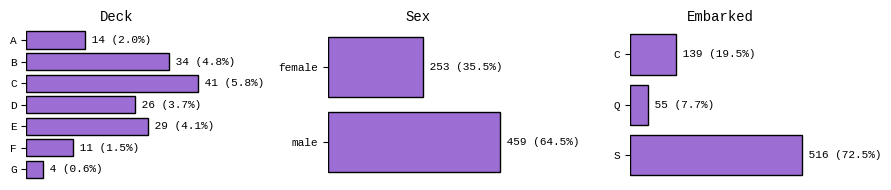

In [ ]:
plot_cat_features(X_train, train_cat_features)

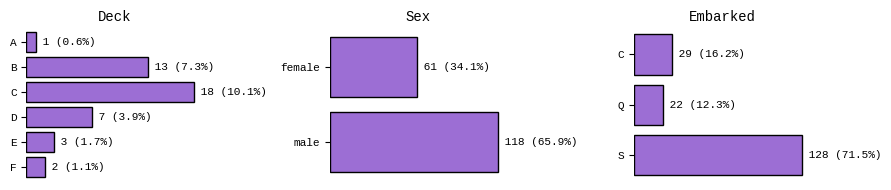

In [ ]:
plot_cat_features(X_test, train_cat_features)

**OBS:** A distribuição da variável `Sex` manteve-se consistente entre os conjuntos de treino e teste.  
Na variável `Embarked`, as classes `"C"` (Cherbourg - França) e `"Q"` (Queenstown - Irlanda) apresentaram desvios moderados, mas dentro do esperado.  
Já na variável `Deck`, observou-se uma discrepância significativa: cerca de **77,67%** dos registros estão ausentes no conjunto de treino, contra **75,42%** no conjunto de teste.  
Essa diferença na proporção de valores ausentes pode estar contribuindo para a distorção na distribuição observada.


**Visualização Gráfica das Variáveis Numéricas dos Dados de Treino e Teste**

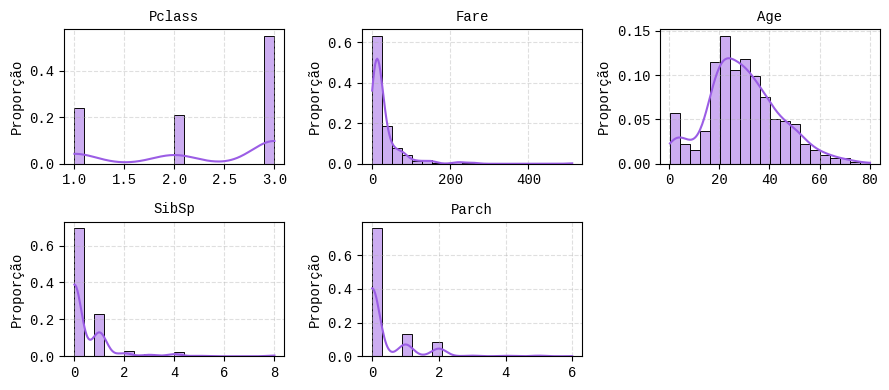

In [ ]:
plot_num_features(X_train, train_num_features)

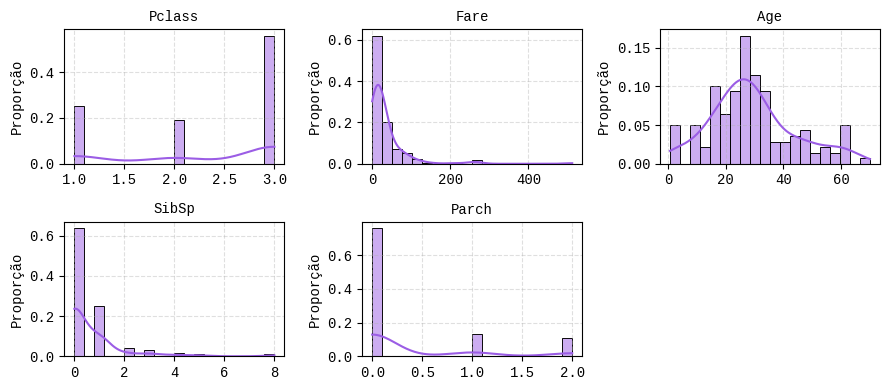

In [ ]:
plot_num_features(X_test, train_num_features)

**OBS:** Com exceção da variável `Age`, todas as outras apresentaram excelentes concordancias nas distribuições entre dados de treino e teste. Quanto a variável `Age`, acredito que a diferença na distribução se deva pelo mesmo motivo dos dados ausentes (treino: 19,24%, teste: 22,35%)

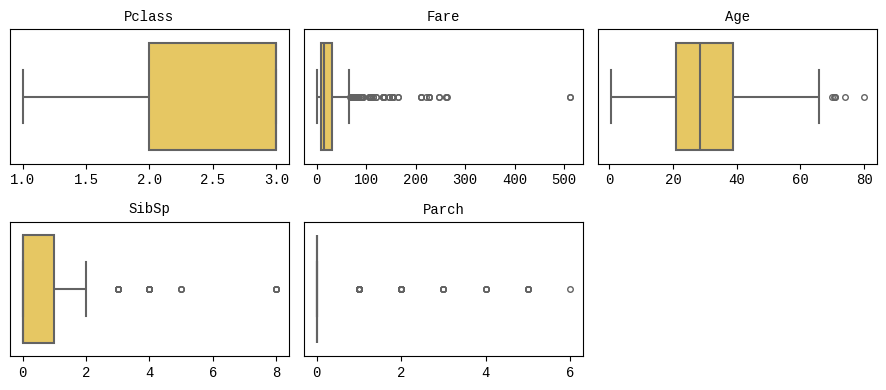

In [ ]:
plot_boxplots(X_train, train_num_features)

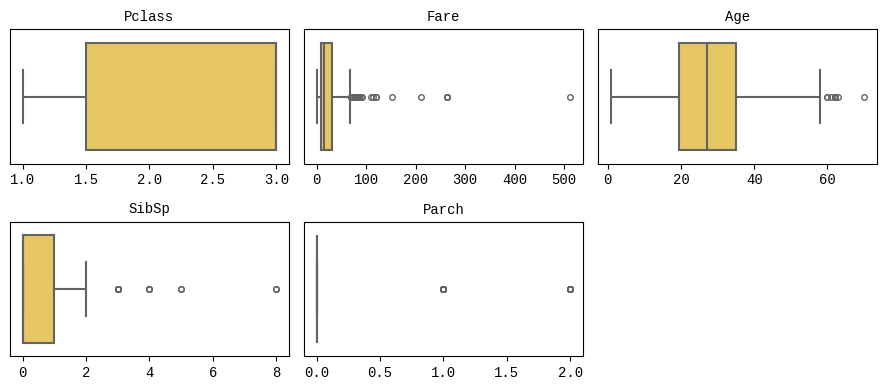

In [ ]:
plot_boxplots(X_test, train_num_features)

**Dados Correlacionais**

In [ ]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.head()

,Pclass,Fare,Deck,Sex,Age,SibSp,Parch,Embarked,Survived
692,3,56.4958,NaN,male,NaN,0,0,S,1
481,2,0.0000,NaN,male,NaN,0,0,S,0
527,1,221.7792,C,male,NaN,0,0,S,0
855,3,9.3500,NaN,female,18.0,0,1,S,1
801,2,26.2500,NaN,female,31.0,1,1,S,1


In [ ]:
corr_matrix = df_train.corr(numeric_only=True)
corr_matrix

,Pclass,Fare,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.556540,-0.351089,0.097900,0.040467,-0.348007
Fare,-0.556540,1.000000,0.106915,0.127011,0.177235,0.275499
Age,-0.351089,0.106915,1.000000,-0.312885,-0.175573,-0.084268
SibSp,0.097900,0.127011,-0.312885,1.000000,0.392269,-0.026115
Parch,0.040467,0.177235,-0.175573,0.392269,1.000000,0.084178
Survived,-0.348007,0.275499,-0.084268,-0.026115,0.084178,1.000000


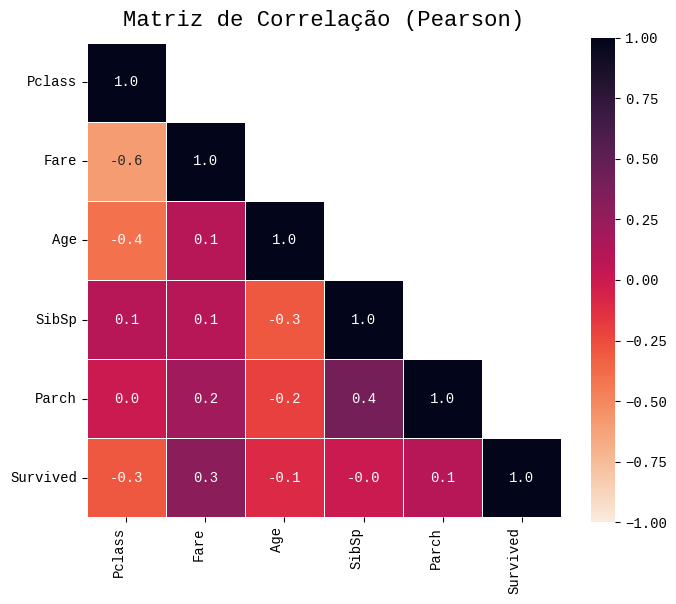

In [ ]:
plot_corr_matrix(df_train, cmap='rocket_r', figsize=(7,7))

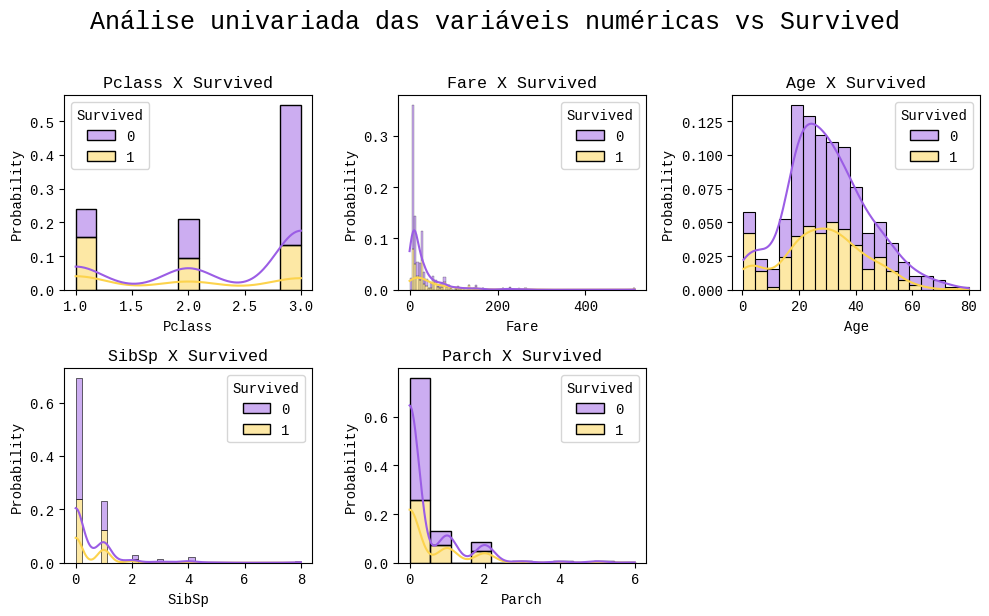

In [ ]:
num_features = df_train.select_dtypes(include='number').drop(columns=['Survived']).columns.tolist()

num_analysis_plots(
    data=df_train,
    features=train_num_features,
    target='Survived',
    histplot=True,
    kde=True,
    hue='Survived',
    figsize=(10, 6)
)

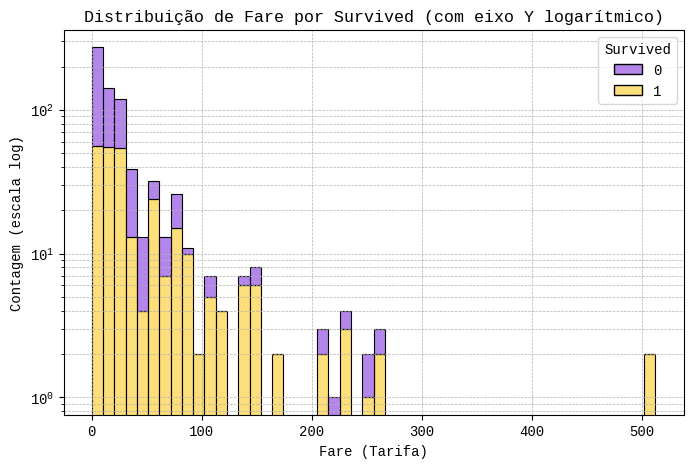

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df_train, x='Fare', hue='Survived', multiple='stack', bins=50)
plt.yscale('log')
plt.xlabel('Fare (Tarifa)')
plt.ylabel('Contagem (escala log)')
plt.title('Distribuição de Fare por Survived (com eixo Y logarítmico)')
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

In [ ]:
# Total de crianças com idade conhecida (<= 10 anos)
total_kids = len(df_train[(df_train['Age'].notna()) & (df_train['Age'] <= 10)])
print(f"Total de crianças (<= 10 anos) com idade conhecida: {total_kids}")

# Crianças da 3ª classe
kids_class3 = len(df_train[(df_train['Age'].notna()) & (df_train['Age'] <= 10) & (df_train['Pclass'] == 3)])
print(f"Crianças (<= 10 anos) da 3ª classe: {kids_class3}")

# Crianças da 3ª classe que sobreviveram
kids_class3_survived = len(df_train[(df_train['Age'].notna()) & (df_train['Age'] <= 10) & (df_train['Pclass'] == 3) & (df_train['Survived'] == 1)])
print(f"Crianças (<= 10 anos) da 3ª classe que sobreviveram: {kids_class3_survived}")

# Crianças das 1ª e 2ª classes
kids_class12 = len(df_train[(df_train['Age'].notna()) & (df_train['Age'] <= 10) & (df_train['Pclass'].isin([1, 2]))])
print(f"Crianças (<= 10 anos) da 1ª e 2ª classes: {kids_class12}")

# Crianças das 1ª e 2ª classes que sobreviveram
kids_class12_survived = len(df_train[(df_train['Age'].notna()) & (df_train['Age'] <= 10) & (df_train['Pclass'].isin([1, 2])) & (df_train['Survived'] == 1)])
print(f"Crianças (<= 10 anos) da 1ª e 2ª classes que sobreviveram: {kids_class12_survived}")


Total de crianças (<= 10 anos) com idade conhecida: 52
Crianças (<= 10 anos) da 3ª classe: 35
Crianças (<= 10 anos) da 3ª classe que sobreviveram: 15
Crianças (<= 10 anos) da 1ª e 2ª classes: 17
Crianças (<= 10 anos) da 1ª e 2ª classes que sobreviveram: 17


### Análise de Sobrevivência: Crianças (≤ 10 anos)

Essa análise foi motivada por uma observação feita ao visualizar o histograma da variável `Age`. Nota-se que, entre os passageiros com idade conhecida, **a maioria das pessoas com menos de 10 anos NÃO sobreviveu** — o que contradiz diretamente o protocolo histórico de evacuação “*mulheres e crianças primeiro*”. Vale lembrar que a variável `Age` possui cerca de **19% de valores ausentes**, o que pode influenciar essas conclusões e deve ser levado em consideração.

Abaixo, detalha-se a distribuição de sobrevivência entre as crianças com idade conhecida:

- **Total de crianças com idade conhecida**: 52
- **Crianças da 3ª classe**: 35  
  - Dessas, **15 não sobreviveram** (~43%)
- **Crianças das 1ª e 2ª classes**: 17  
  - **Todas sobreviveram** (100%)

---

### Interpretação

Esse padrão sugere que a **classe social teve impacto direto na chance de sobrevivência**, mesmo entre o grupo prioritário das crianças. Embora o protocolo "mulheres e crianças primeiro" tenha sido aplicado, os dados mostram que **crianças da 3ª classe não receberam o mesmo tratamento que as das classes superiores**.

Essa discrepância é um indício forte de desigualdade no acesso aos botes salva-vidas e pode justificar a criação de uma **variável interacional entre `Age` e `Pclass`** nos modelos de Machine Learning.

---


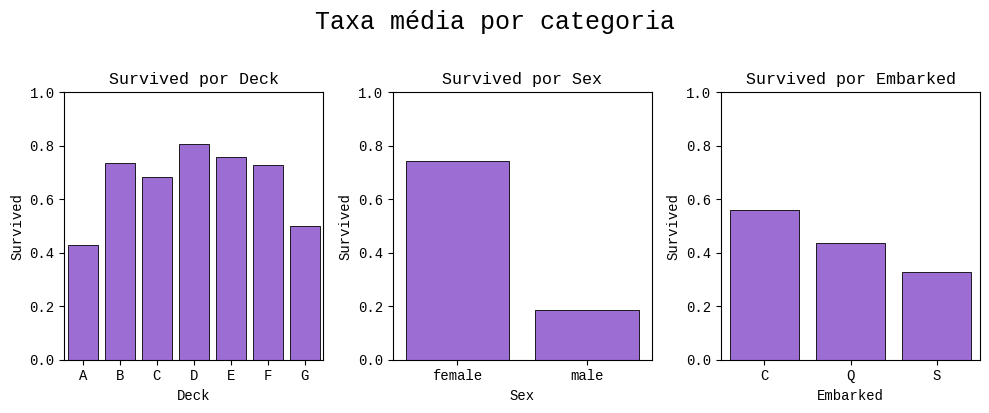

In [ ]:
cat_target_meanplot(
    data=df_train,
    features=train_cat_features,
    target=target,
    figsize=(10, 4),
    n_cols=3)

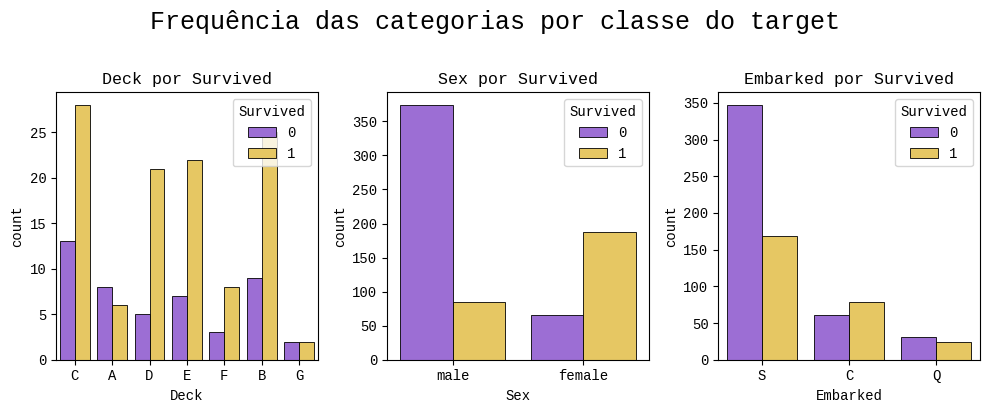

In [ ]:
cat_target_countplot(data=df_train, features=train_cat_features, target=target, figsize=(10, 4), n_cols=3)

In [ ]:
print(f"Nº de passageiros que embarcaram em Cherbourg (França) e sobreviveram: {len(df_train[(df_train['Embarked'] == 'C') & (df_train['Survived'] == 1)])}")
print(f"Nº de passageiros que embarcaram em Cherbourg (França) e NÃO sobreviveram: {len(df_train[(df_train['Embarked'] == 'C') & (df_train['Survived'] == 0)])}")

Nº de passageiros que embarcaram em Cherbourg (França) e sobreviveram: 78
Nº de passageiros que embarcaram em Cherbourg (França) e NÃO sobreviveram: 61


**Análise da variável `Embarked`**

Com base na distribuição da variável `Embarked`, observamos que o porto de embarque **Cherbourg ("C")** apresentou:

- **78 passageiros sobreviventes**
- **61 passageiros não sobreviventes**

Ou seja, uma **taxa de sobrevivência de aproximadamente 56%**, que é significativamente superior à taxa média geral do conjunto de dados, em torno de 38%.

Isso indica que o local de embarque pode estar associado a características socioeconômicas ou geográficas que influenciam a sobrevivência dos passageiros, especialmente quando combinadas com outras variáveis como `Pclass` e `Fare`.

**Conclusão:** a variável `Embarked` carrega informação potencialmente relevante para a predição de sobrevivência e **deve ser mantida** no conjunto de dados.


**Análise da Variável `Deck`**

In [ ]:
summary_df(df_train)[summary_df(df_train)['Variables'] == 'Deck']

,Variables,DataType,UniqueValues,ExistingValues,MissingValues,Existingpercent,MissingPercent
2,Deck,object,7,159,553,22.331461,77.668539


In [ ]:
# Filtra os passageiros que possuem informação sobre o deck (cabine conhecida)
total_deck_known = len(df_train[~df_train["Deck"].isna()])
print(f'Total de passageiros com Deck conhecido: {total_deck_known}')

# Entre os que têm Deck conhecido, conta quantos NÃO sobreviveram
not_survived_with_deck = len(df_train[(~df_train["Deck"].isna()) & (df_train["Survived"] == 0)])
print(f'Passageiros com Deck conhecido que NÃO sobreviveram: {not_survived_with_deck}')

# Entre os que têm Deck conhecido, conta quantos sobreviveram
survived_with_deck = len(df_train[(~df_train["Deck"].isna()) & (df_train["Survived"] == 1)])
print(f'Passageiros com Deck conhecido que sobreviveram: {survived_with_deck}')


Total de passageiros com Deck conhecido: 159
Passageiros com Deck conhecido que NÃO sobreviveram: 47
Passageiros com Deck conhecido que sobreviveram: 112


> **OBS:** Na análise da variável `Deck`, observamos uma aparente inconsistência: a maioria dos passageiros com valor conhecido para `Deck` sobreviveu, o que não condiz com os dados históricos gerais do Titanic e nem com a análise preliminar feita com os dados brutos da variável `Survived`.  
>
> Isso se deve ao fato de que de todos os passageiros "contabilizados", a maioria sobreviveu, logo essa amostra já está enviesada. Lembrando que a variável possui um mais de 77% de dados ausentes.
>
> - Total com `Deck` conhecido: **159**  
> - Sobreviventes com `Deck` conhecido: **112**  
> - Não sobreviventes com `Deck` conhecido: **47**


### Dados Ausentes e Comportamento Anômalo

Durante a análise exploratória, duas variáveis chamaram atenção tanto pela **alta taxa de dados ausentes** quanto por apresentarem **comportamentos estatísticos anômalos** em histogramas e gráficos de barras: `Age` e `Deck`.

- A variável **`Age`** apresenta aproximadamente **19% de dados ausentes**, e seu histograma indicou uma **mortalidade elevada entre crianças com menos de 10 anos**, o que contraria o conhecido protocolo histórico "mulheres e crianças primeiro".
- Já a variável **`Deck`** possui uma ausência ainda mais significativa: cerca de **77.67% no conjunto de treino** e **75.42% no conjunto de teste**. As análises mostraram que **a maioria dos passageiros com esse dado preenchido sobreviveu**, gerando uma distribuição enviesada.

**Essas observações motivaram estudos de caso específicos**, com o objetivo de compreender a origem dessas anomalias e definir **estratégias mais conscientes para preenchimento dos dados ausentes**. Não se trata apenas de imputar valores, mas de **preservar a integridade estatística e histórica dos dados**.

---

Com base nessas análises, as decisões de imputação não serão arbitrárias, mas **fundamentadas em evidência contextual, distribuição condicional e possíveis interações com outras variáveis** como `Pclass`, `Sex`, e `Survived`.


**Associação entre `Deck` e `Pclass`**

In [ ]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df_train['Deck'], df_train['Pclass'])
chi2, p, dof, expected = chi2_contingency(contingency)

print("p-valor:", p)

p-valor: 5.622412553565746e-26


In [ ]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

print(f'Cramers-V: {cramers_v(contingency)}')

Cramers-V: 0.6868440012837774


Foi construída uma matriz de contingência entre as variáveis `Deck` e `Pclass`, e aplicado o teste de independência qui-quadrado, em seguida foi feita a aplicação da métrica **Cramér’s V** para avaliar a força da associação:

- **p-valor**: `5.62e-26`  
  Resultado extremamente significativo. Rejeitamos a hipótese nula de independência. Existe forte dependência entre as variáveis.

- **Cramér’s V**: `0.6868`  
  Associação **forte** (valores acima de 0.5 são considerados altos).


**Conclusão:**

A variável `Deck` possui **forte associação com `Pclass`**, Seu conteúdo informativo já está representado por essa variável. Além disso, `Deck` apresenta cerca de **77% de valores ausentes**, o que dificultaria qualquer tentativa de imputação sem enviesar os dados. A distribuição dos valores não ausentes também está **desbalanceada**, concentrando-se desproporcionalmente entre passageiros que **sobreviveram**, o que adiciona risco de viés.

**Decisão:** Eliminar a variável `Deck`:

- Remove **redundância de informação**.
- Evita **multicolinearidade**.
- Mantém a **integridade estatística** da amostra.
- Facilita a modelagem e interpretação sem perda significativa de valor preditivo.

A variável `Deck`, embora intuitivamente relevante, é estatisticamente supérflua neste contexto.


**Análise de imputação da variável `Age`**


In [ ]:
print(f'Média das idades: {df_train["Age"].mean().round(1)}')
print(f'Médiana das idades: {df_train["Age"].median()}')

Média das idades: 29.8
Médiana das idades: 28.5


In [ ]:
print(f'Total de passageiros com idade conhecida: {len(df_train[df_train["Age"].notna()])}')
print(f'Total de passageiros com idade DESconhecida: {len(df_train[df_train["Age"].isna()])}')
print(f'Total de passageiros com idade menor ou a igual a 10 anos: {len(df_train[df_train["Age"] <= 10])}\n')
print(f'Mediana dos passageiros com <= 10 anos: {df_train[df_train["Age"] <= 10]["Age"].median()} anos')
print(f'Mediana dos passageiros com > 10 anos: {df_train[df_train["Age"] > 10]["Age"].median()} anos')


Total de passageiros com idade conhecida: 575
Total de passageiros com idade DESconhecida: 137
Total de passageiros com idade menor ou a igual a 10 anos: 52

Mediana dos passageiros com <= 10 anos: 4.0 anos
Mediana dos passageiros com > 10 anos: 30.0 anos


Conforme observado anteriormente, existe uma anomalia significativa no número de mortos em passageiros com idade abaixo de 10 anos, a tentativa de imputar 137 valores ausentes com a média ou com a mediana pode distorcer a proporção de crianças que como visto, tem papel relevante:
- **na sobreviência:** 100% de taxa entre a 1ª e 2ª Classes
- **representatividade por Classe:** maioria pertencente a 1ª Classe

Imputar 137 "adultos", apagaria os sinais das "crianças" no modelo, o que prejudicaria:
- a interpretação dos gráficos
- o aprendizado dos modelos supervisionados

**Estratégia de imputação em `Age`**

Como existem 575 passageiros com idade conhecida e 52 (9%) delas são menores que 10 anos e 137 passageiros com idade desconhecida então a imputação dos dados será feita de forma proporcional.
- Imputar condicinalmente 12 passageiros (9% de 137) com a mediana (4 anos) dos passageiros com menos de 10 anos
- Imputar condicinalmente o restante dos passageiros coma (30 anos) dos passageiros com mais de 10 anos

**OBS:** A imputação da idade das crianças não será feita de forma aleatória. Serão localizados passageiros da 3ª classe com `SibSP` e `Parch` diferentes de 0. Pois são grupos com tendencia a terem crianças

### Imputação Condicional da Variável `Age`

Durante a análise exploratória, foi identificada uma anomalia relevante: entre os passageiros com idade conhecida, observou-se um número surpreendentemente alto de crianças com menos de 10 anos que **não sobreviveram** — o que contradiz o histórico princípio de "mulheres e crianças primeiro".

Imputar os **137 valores ausentes** da variável `Age` com a **média (~29.8 anos)** ou **mediana (~28.3 anos)** da amostra poderia distorcer a distribuição etária e apagar os sinais das crianças no conjunto de dados, comprometendo:

- A interpretação dos gráficos;
- O aprendizado de padrões relevantes pelos modelos supervisionados.

#### Indicadores que justificam uma estratégia diferenciada para crianças:
- **Taxa de sobrevivência**: 100% das crianças da 1ª e 2ª classes sobreviveram.
- **Distribuição por classe**: a maioria das crianças está na 3ª classe.

---

### Estratégia de Imputação Proporcional

Dos **575 passageiros com idade conhecida**, **52** (cerca de 9%) têm 10 anos ou menos. Mantendo essa proporção sobre os 137 passageiros com idade ausente:

- **12 passageiros (9%)** serão imputados como **crianças**, utilizando a mediana entre os menores de 10 anos: **4 anos**;
- **125 passageiros restantes** serão imputados com a mediana dos adultos (idade > 10): **30 anos**.

---

### Critério de Seleção para Imputação Infantil

A imputação de idade infantil **não será aleatória**. Os 12 passageiros selecionados para receber idade de criança serão escolhidos entre os passageiros da **3ª classe** que apresentam `SibSp > 0` ou `Parch > 0`, isto é, viajavam com familiares — um perfil consistente com o de crianças acompanhadas.


#5. Pré-Processamento

In [ ]:
X_train

,Pclass,Fare,Deck,Sex,Age,SibSp,Parch,Embarked
692,3,56.4958,NaN,male,NaN,0,0,S
481,2,0.0000,NaN,male,NaN,0,0,S
527,1,221.7792,C,male,NaN,0,0,S
855,3,9.3500,NaN,female,18.0,0,1,S
801,2,26.2500,NaN,female,31.0,1,1,S
...,...,...,...,...,...,...,...,...
359,3,7.8792,NaN,female,NaN,0,0,Q
258,1,512.3292,NaN,female,35.0,0,0,C
736,3,34.3750,NaN,female,48.0,1,3,S
462,1,38.5000,E,male,47.0,0,0,S


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
class DropColumns(BaseEstimator, TransformerMixin):
  def __init__(self, columns):
      self.columns = columns

  def fit(self, X, y=None):
      return self

  def transform(self, X):
      return X.drop(columns=self.columns)

In [ ]:
class AgeImputer(BaseEstimator, TransformerMixin):
  def __init__(self, age_threshold=10):
      self.age_threshold = age_threshold
      self.child_median = None
      self.adult_median = None

  def fit(self, X, y=None):
      self.child_median = X.loc[X['Age'] <= self.age_threshold, 'Age'].median()
      self.adult_median = X.loc[X['Age'] > self.age_threshold, 'Age'].median()
      return self

  def transform(self, X):
      X = X.copy()
      missing_age = X['Age'].isna()

      # Condição para identificar prováveis crianças:
      likely_kids = (
          (X['Pclass'] == 3) |
          (X['SibSp'] > 0) |
          (X['Parch'] > 0)
      )

      # Imputação condicional
      X.loc[missing_age & likely_kids, 'Age'] = self.child_median
      X.loc[missing_age & ~likely_kids, 'Age'] = self.adult_median

      return X

In [ ]:
# Categóricas: imputação com moda + OneHotEncoder
categorical_preprocessor = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop='first'))  # drop='first' evita multicolinearidade
])

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('cat', categorical_preprocessor, ['Sex', 'Embarked']),
], remainder='passthrough')

In [ ]:
categorical_cols = ['Sex', 'Embarked']
drop_cols = ['Deck']
num_cols = [col for col in X_train.columns if col not in categorical_cols + drop_cols]

In [ ]:
class DataFrameConverter(BaseEstimator, TransformerMixin):
  def __init__(self, categorical_cols, drop_cols):
      self.categorical_cols = categorical_cols
      self.drop_cols = drop_cols
      self.feature_names = None

  def fit(self, X, y=None):
      # Pega os nomes das colunas numéricas (remainder='passthrough')
      self.num_cols_ = [col for col in X.columns if col not in self.categorical_cols + self.drop_cols]

      return self

  def transform(self, X):
      # Aplica a transformação anterior da pipeline
      X_transformed = X

      # Recupera os nomes vindos do OneHotEncoder
      ohe = self._get_ohe()
      cat_feature_names = ohe.get_feature_names_out(self.categorical_cols)

      # Concatena com colunas numéricas
      all_feature_names = list(cat_feature_names) + self.num_cols_

      # Cria DataFrame com os nomes e mantém o índice original
      return pd.DataFrame(X_transformed, columns=all_feature_names, index=X.index)

  def _get_ohe(self):
      # Acha o encoder dentro do pipeline aninhado
      return self.pipeline.named_steps["preprocessor"] \
                          .named_transformers_["cat"] \
                          .named_steps["encoder"]

  def set_pipeline(self, pipeline):
      self.pipeline = pipeline  # para ter acesso aos nomes depois do fit

df_converter = DataFrameConverter(categorical_cols=categorical_cols, drop_cols=drop_cols)

In [ ]:
full_pipeline = Pipeline(steps=[
    ("drop_deck", DropColumns(columns=['Deck'])),
    ("age_imputer", AgeImputer()),
    ("preprocessor", preprocessor),
    ("to_dataframe", df_converter)  # Novo passo final
])

df_converter.set_pipeline(full_pipeline)

In [ ]:
full_pipeline.fit(X_train)

X_train_ready = full_pipeline.transform(X_train)
X_test_ready = full_pipeline.transform(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
X_train_ready

In [ ]:
X_test_ready

In [ ]:
# categorical_cols = ['Sex', 'Embarked']
# drop_cols = ['Deck']
# num_cols = [col for col in X_train.columns if col not in categorical_cols + drop_cols]

In [ ]:
# # Pipeline como já definimos
# full_pipeline.fit(X_train)

# X_train = full_pipeline.transform(X_train)
# X_test = full_pipeline.transform(X_test)

In [ ]:
# pd.DataFrame(X_train)

In [ ]:
# ohe = full_pipeline.named_steps["preprocessor"].named_transformers_["cat"].named_steps["encoder"]
# cat_feature_names = ohe.get_feature_names_out(categorical_cols)
# all_feature_names = list(cat_feature_names) + num_cols

In [ ]:
# X_train = pd.DataFrame(X_train, columns=all_feature_names)
# X_train